# CSMODEL Project 2

Authors:

* Carlo Bautista
* Dan John Velasco

Section: S13

Dataset: Dataset11.csv

## Setup

In [1]:
# Import modules here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist
from pandas.plotting import scatter_matrix
import numpy as np
from kmeans import KMeans # kmeans python file

## Dataset Representation

Dataset 11 contains data about music. It has 11 dimensions and 900 observations. Each observation represents a music and each column (f1 to f10) describes a certain property of the music. The 'class' column represents the genre of the music.

**Description of features:**


-F1 represents the frequency of the music

-F2 represents the amplitude of the music

-F3 represents the pitch of the music

-F4 represents the timbre of the music

-F5 represents harmony of the music

-F6 represents the rythm of the music

-F7 represents the tempo of the music

-F8 represents the words per minute of the music

-F9 represents bars per minute of the music

-F10 represents the BPM (beats per minute of the music)

Description of classes:

**Description of classes (genre):**

* class 0 - rap 
* class 1 - pop
* class 2 - rock


In [2]:
df = pd.read_csv('Dataset11.csv', index_col=0)
df.head()

f1         f2         f3         f4         f5         f6  \
0  -5.699125   8.449561  30.875664  47.773231  32.884902  45.250783   
1   6.030131  22.533122  15.075734  28.544156  38.537057  39.805044   
2  -0.356025  16.863241  30.352450  27.997120  48.443486  50.720679   
3   3.614499  13.278124   1.082431  28.429107  40.602890  46.079687   
4  10.760814   5.927993  27.371484  24.124494  31.336305  48.878828   

          f7         f8         f9        f10  class  
0  56.890688  81.865447  64.787604  92.026391      0  
1  59.917153  78.945633  92.163595  89.757399      0  
2  41.286631  68.994019  78.061872  95.996339      0  
3  51.289514  77.735827  73.526707  82.443674      0  
4  65.005203  72.817452  79.420383  81.563562      0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      900 non-null    float64
 1   f2      900 non-null    float64
 2   f3      900 non-null    float64
 3   f4      900 non-null    float64
 4   f5      900 non-null    float64
 5   f6      900 non-null    float64
 6   f7      900 non-null    float64
 7   f8      900 non-null    float64
 8   f9      900 non-null    float64
 9   f10     900 non-null    float64
 10  class   900 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 84.4 KB


In [4]:
df.shape

(900, 11)

## Exploratory Data Analysis

### Question 1: Are there any relationships among the features?

To determine whether or not certain variables are likely to be clustered together, The relationships of the variables with each other is to be found.

In order to achieve this goal, we find the pairwise correlation of each variable with each other.

In [5]:
# Numeric
corr = df.corr(method = "pearson")
corr

f1        f2        f3        f4        f5        f6        f7  \
f1     1.000000  0.018831  0.008024  0.045155  0.035752 -0.026501  0.001371   
f2     0.018831  1.000000  0.041940  0.067681 -0.002820  0.006549  0.072566   
f3     0.008024  0.041940  1.000000  0.026200  0.041936  0.006957 -0.001107   
f4     0.045155  0.067681  0.026200  1.000000  0.017605 -0.058987  0.011122   
f5     0.035752 -0.002820  0.041936  0.017605  1.000000 -0.025883  0.025115   
f6    -0.026501  0.006549  0.006957 -0.058987 -0.025883  1.000000  0.067260   
f7     0.001371  0.072566 -0.001107  0.011122  0.025115  0.067260  1.000000   
f8     0.000400  0.019794  0.005989 -0.019460 -0.006249 -0.067894 -0.001941   
f9    -0.076098 -0.064919 -0.020245 -0.028094  0.030603  0.000252  0.033738   
f10    0.015333  0.029825  0.030246 -0.019688 -0.002641 -0.038648  0.042488   
class  0.040553  0.050431  0.008057 -0.018444 -0.008052  0.039250  0.009257   

             f8        f9       f10     class  
f1     0.000400 -0.076098  0.015333  0.040553  
f2     0.019794 -0.064919  0.029825  0.050431  
f3     0.005989 -0.020245  0.030246  0.008057  
f4    -0.019460 -0.028094 -0.019688 -0.018444  
f5    -0.006249  0.030603 -0.002641 -0.008052  
f6    -0.067894  0.000252 -0.038648  0.039250  
f7    -0.001941  0.033738  0.042488  0.009257  
f8     1.000000  0.024646  0.003714 -0.001476  
f9     0.024646  1.000000  0.019285 -0.007993  
f10    0.003714  0.019285  1.000000  0.027076  
class -0.001476 -0.007993  0.027076  1.000000

A scatter matrix can be used to easily visualize the relationship each variables have with each other to see if there is a positive or negative correlation

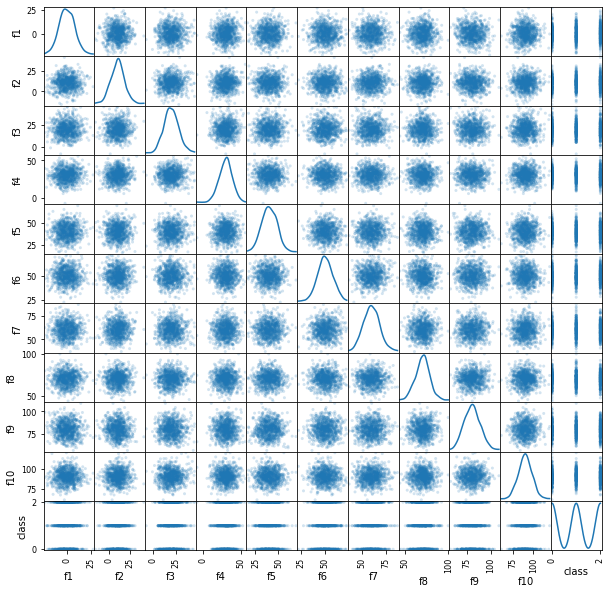

In [6]:
# Visual
pd.plotting.scatter_matrix(df,diagonal = "kde",figsize = (10,10),alpha = 0.2)
plt.show()

As seen from the scatter matrix, Each variable either have no correlation or ,most commonly, the variables have a very weak correlational relationship with each other

### Question 2: How diverse are the values of each feature?

The inuition behind this question is that if the feature values are more spread out, they tend to be more clusterable compared to feature values that are clustered around the mean.

To do this, we take the standard deviation of each feature:

In [7]:
# Numeric
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
df_stats = df.describe()[features]
df_stats

f1          f2          f3          f4          f5          f6  \
count  900.000000  900.000000  900.000000  900.000000  900.000000  900.000000   
mean    -0.005281   10.139918   20.238176   30.022778   40.078957   50.245837   
std      7.828699    7.733214    8.132336    8.423271    8.130967    7.777228   
min    -22.988768  -15.683446   -8.065250   -7.651409   16.510864   22.594709   
25%     -5.408822    4.864658   14.803751   24.340341   34.572079   45.237942   
50%     -0.139663   10.250724   20.077954   30.306298   39.900743   50.009153   
75%      5.575889   15.014022   25.709547   35.299920   45.994511   55.311807   
max     27.208846   40.697174   46.288125   55.600997   69.126415   72.208446   

               f7          f8          f9         f10  
count  900.000000  900.000000  900.000000  900.000000  
mean    60.163033   70.391841   80.257277   90.140429  
std      8.004334    7.898353    8.213975    8.130217  
min     37.159095   44.516721   57.320036   61.495251  
25%     54.647908   65.447121   74.273617   84.945122  
50%     60.067352   70.672951   80.200567   90.189659  
75%     65.586166   75.220680   85.622782   95.403858  
max     86.985006   99.674183  108.821213  119.363805

We can plot it in the bar graph to see if there's a pattern or differences among the standard deviations of each feature.


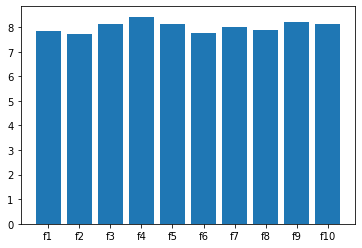

In [8]:
# Visual
x = [i for i in range(df_stats.shape[1])]
plt.bar(x, df_stats.iloc[2])
plt.xticks(x, df_stats.columns)
plt.show()

In the bar plot, we can see that the standard deviation among other features are similar which implies that all features have almost similar distributions which is proven in the plot below. Furthermore, we can observe that the scale of the values among the features are not that drastically different i.e. order of magnitude difference.

array([[<AxesSubplot:title={'center':'f1'}>,
        <AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'f3'}>],
       [<AxesSubplot:title={'center':'f4'}>,
        <AxesSubplot:title={'center':'f5'}>,
        <AxesSubplot:title={'center':'f6'}>],
       [<AxesSubplot:title={'center':'f7'}>,
        <AxesSubplot:title={'center':'f8'}>,
        <AxesSubplot:title={'center':'f9'}>],
       [<AxesSubplot:title={'center':'f10'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

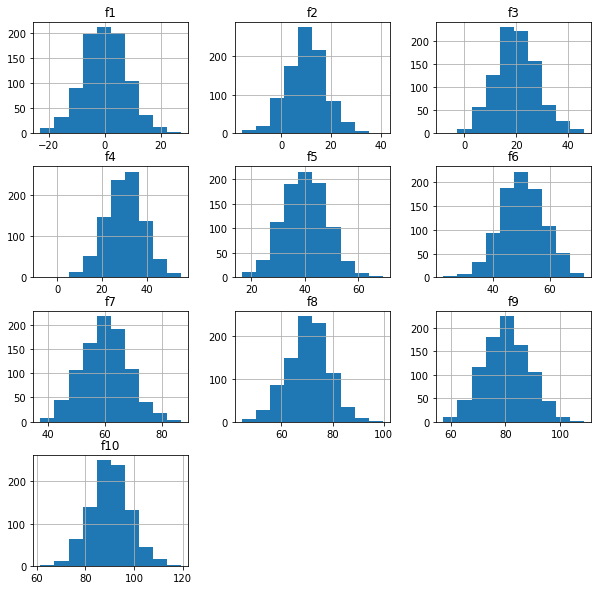

In [9]:
df[features].hist(figsize=(10,10))

## Data Mining

Before clustering:

In [10]:
cluster_0 = df.loc[df['class'] == 0]
cluster_1 = df.loc[df['class'] == 1]
cluster_2 = df.loc[df['class'] == 2]

print('=== BEFORE CLUSTERING ===')
print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class 0:\t', cluster_0.loc[cluster_0['class'] == 0].shape[0])
print('Class 1:\t', cluster_0.loc[cluster_0['class'] == 1].shape[0])
print('Class 2:\t', cluster_0.loc[cluster_0['class'] == 2].shape[0])
print('Cluster 1:')
print('Class 0:\t', cluster_1.loc[cluster_1['class'] == 0].shape[0])
print('Class 1:\t', cluster_1.loc[cluster_1['class'] == 1].shape[0])
print('Class 2:\t', cluster_1.loc[cluster_1['class'] == 2].shape[0])
print('Cluster 2:')
print('Class 0:\t', cluster_2.loc[cluster_2['class'] == 0].shape[0])
print('Class 1:\t', cluster_2.loc[cluster_2['class'] == 1].shape[0])
print('Class 2:\t', cluster_2.loc[cluster_2['class'] == 2].shape[0])

=== BEFORE CLUSTERING ===
Number of data points in each cluster:
Cluster 0:
Class 0:	 300
Class 1:	 0
Class 2:	 0
Cluster 1:
Class 0:	 0
Class 1:	 300
Class 2:	 0
Cluster 2:
Class 0:	 0
Class 1:	 0
Class 2:	 300


In [11]:
#KMeans
kmeans = KMeans(3, 0, 10, 900, df)
kmeans.initialize_centroids(df)
groups = kmeans.train(df, 300)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Done clustering!


After clustering:

In [12]:
cluster_0 = df.loc[groups == 0]
cluster_1 = df.loc[groups == 1]
cluster_2 = df.loc[groups == 2]

print('=== AFTER CLUSTERING ===')
print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class 0:\t', cluster_0.loc[cluster_0['class'] == 0].shape[0])
print('Class 1:\t', cluster_0.loc[cluster_0['class'] == 1].shape[0])
print('Class 2:\t', cluster_0.loc[cluster_0['class'] == 2].shape[0])
print('Cluster 1:')
print('Class 0:\t', cluster_1.loc[cluster_1['class'] == 0].shape[0])
print('Class 1:\t', cluster_1.loc[cluster_1['class'] == 1].shape[0])
print('Class 2:\t', cluster_1.loc[cluster_1['class'] == 2].shape[0])
print('Cluster 2:')
print('Class 0:\t', cluster_2.loc[cluster_2['class'] == 0].shape[0])
print('Class 1:\t', cluster_2.loc[cluster_2['class'] == 1].shape[0])
print('Class 2:\t', cluster_2.loc[cluster_2['class'] == 2].shape[0])

=== AFTER CLUSTERING ===
Number of data points in each cluster:
Cluster 0:
Class 0:	 124
Class 1:	 120
Class 2:	 111
Cluster 1:
Class 0:	 96
Class 1:	 96
Class 2:	 98
Cluster 2:
Class 0:	 80
Class 1:	 84
Class 2:	 91


## Insights and Conclusion

As we can see from the results above, there's no dominant class for each cluster. This tells us that the dataset is not naturally clusterable. This was also hinted in the EDA where the features bears no correlation and its values are less diverse i.e. the spread is low for all features. This makes it hard for the algorithm to cluster because the distance metric won't be that helpful if most values are close to each other.


Furthermore, if we run a dimensionality reduction technique and visualize the dataset (see below), it will look like a normal distribution just like the distribution of each features in the dataset. Thus, this further adds evidence that the dataset is not naturally clusterable.

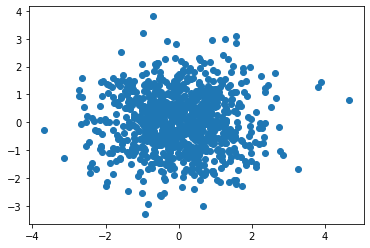

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
plt.scatter(principalComponents[:,0], principalComponents[:,1])